In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
df_housing = pd.read_csv('train.csv')
df_housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# print info of dataset
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_housing.drop('Id', axis=1, inplace=True)

In [5]:
# set max displayed rows and columns to 100
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [6]:
df_housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# find columns with null values
null_per = 100 * df_housing.isnull().sum() / df_housing.shape[0]
null_per[null_per > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Many columns has a meaning full NA values. Those columns are:
- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

In [8]:
df_housing['Alley'].fillna('No Alley', inplace = True)
df_housing['BsmtQual'].fillna('No Basement', inplace = True)
df_housing['BsmtCond'].fillna('No Basement', inplace = True)
df_housing['BsmtExposure'].fillna('No Basement', inplace = True)
df_housing['BsmtFinType1'].fillna('No Basement', inplace = True)
df_housing['BsmtFinType2'].fillna('No Basement', inplace = True)
df_housing['FireplaceQu'].fillna('No Fireplace', inplace = True)
df_housing['GarageType'].fillna('No Garage', inplace = True)
df_housing['GarageYrBlt'].fillna('No Garage', inplace = True)
df_housing['GarageFinish'].fillna('No Garage', inplace = True)
df_housing['GarageQual'].fillna('No Garage', inplace = True)
df_housing['GarageCond'].fillna('No Garage', inplace = True)
df_housing['PoolQC'].fillna('No Fireplace', inplace = True)
df_housing['Fence'].fillna('No Fence', inplace = True)
df_housing['MiscFeature'].fillna('None', inplace = True)

In [9]:
# find columns with null values
null_per = 100 * df_housing.isnull().sum() / df_housing.shape[0]
null_per[null_per > 0]

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

#### Imputing LotFrontage

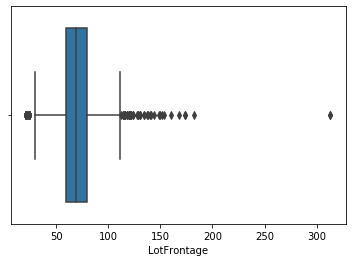

In [10]:
sns.boxplot(df_housing['LotFrontage'])
plt.show()

In [11]:
df_housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
# imputing with median
df_housing['LotFrontage'] = df_housing['LotFrontage'].fillna(df_housing['LotFrontage'].median())

#### Imputing MasVnrType

In [13]:
round(df_housing['MasVnrType'].value_counts(normalize=True) * 100, 2)

None       59.50
BrkFace    30.65
Stone       8.82
BrkCmn      1.03
Name: MasVnrType, dtype: float64

In [14]:
df_housing['MasVnrType'] = df_housing['MasVnrType'].fillna(df_housing['MasVnrType'].mode()[0])

#### Imputing MasVnrArea

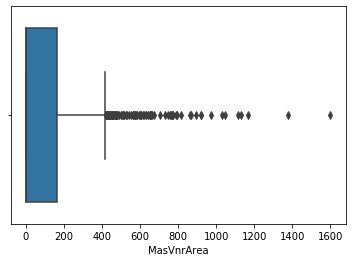

In [15]:
sns.boxplot(df_housing['MasVnrArea'])
plt.show()

In [16]:
df_housing.loc[df_housing['MasVnrArea'].isna(), ['MasVnrType', 'MasVnrArea']].head(100)

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


All these has MasVnrType None so let's set MasVnrArea to 0

In [17]:
df_housing['MasVnrArea'] = df_housing['MasVnrArea'].fillna(0)

#### Imputing Electrical

In [18]:
df_housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [19]:
df_housing['Electrical'].fillna(df_housing['Electrical'].mode()[0], inplace = True)

In [20]:
# remaining null values
null_per = 100 * df_housing.isnull().sum() / df_housing.shape[0]
null_per[null_per > 0]

Series([], dtype: float64)

#### Check If sale is normally distributed

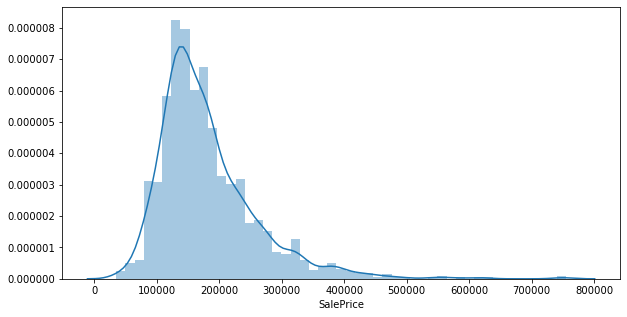

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df_housing['SalePrice'])
plt.show()

#### Log Transformation

In [22]:
df_housing['SalePrice'] = np.log(df_housing['SalePrice'])

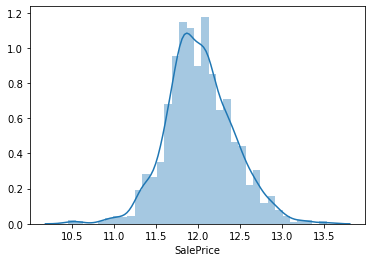

In [23]:
sns.distplot(df_housing['SalePrice'])
plt.show()

#### Drop highly skewed categorical columns

In [24]:
cat_columns = df_housing.select_dtypes('object').columns
cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
for col in cat_columns:
    print(col + ':')
    print(round(100 * df_housing[col].value_counts(normalize=True), 2))
    print('-------------')

MSZoning:
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64
-------------
Street:
Pave    99.59
Grvl     0.41
Name: Street, dtype: float64
-------------
Alley:
No Alley    93.77
Grvl         3.42
Pave         2.81
Name: Alley, dtype: float64
-------------
LotShape:
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64
-------------
LandContour:
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64
-------------
Utilities:
AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64
-------------
LotConfig:
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64
-------------
LandSlope:
Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64
-------------
Neighborhood:
NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.2

In [26]:
skewed_cols = []
for col in cat_columns:
    per_count = 100 * df_housing[col].value_counts(normalize=True)
    if per_count[0] >= 99:
        skewed_cols.append(col)
print(skewed_cols)

['Street', 'Utilities', 'PoolQC']


In [27]:
df_housing = df_housing.drop(skewed_cols, axis=1)

#### Merge low percentage categories

In [28]:
cat_columns = df_housing.select_dtypes('object').columns
for col in cat_columns:
    print(col + ':')
    print(round(100 * df_housing[col].value_counts(normalize=True), 2))
    print('-------------')

MSZoning:
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64
-------------
Alley:
No Alley    93.77
Grvl         3.42
Pave         2.81
Name: Alley, dtype: float64
-------------
LotShape:
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64
-------------
LandContour:
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64
-------------
LotConfig:
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64
-------------
LandSlope:
Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64
-------------
Neighborhood:
NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1

In [29]:
def replace_with_others(col, per):
    temp = round(100 * df_housing[col].value_counts(normalize=True), 2)
    temp = temp[temp < per]
    df_housing[col] = df_housing[col].apply(lambda x : 'Others' if x in temp.index else x)

In [30]:
replace_with_others('Alley', 5)
replace_with_others('LotShape', 5)
replace_with_others('LotConfig', 5)
replace_with_others('LandSlope', 5)
replace_with_others('Neighborhood', 2)
replace_with_others('Condition1', 5)
replace_with_others('Condition2', 1)
replace_with_others('BldgType', 5)
replace_with_others('HouseStyle', 3)
replace_with_others('RoofStyle', 5)
replace_with_others('RoofMatl', 5)
replace_with_others('Exterior1st', 1)
replace_with_others('Exterior2nd', 1)
replace_with_others('MasVnrType', 10)
replace_with_others('ExterCond', 5)
replace_with_others('Foundation', 5)
replace_with_others('Heating', 5)
replace_with_others('HeatingQC', 5)
replace_with_others('Electrical', 5)
replace_with_others('Functional', 5)
replace_with_others('FireplaceQu', 5)
replace_with_others('MiscFeature', 5)
replace_with_others('SaleType', 5)
replace_with_others('SaleCondition', 5)
replace_with_others('BsmtQual', 5)
replace_with_others('BsmtCond', 5)
replace_with_others('BsmtFinType1', 7)
replace_with_others('BsmtFinType2', 5)

#### Converting Year columns to Age Column

In [31]:
from datetime import date

In [32]:
cur_year = int(date.today().year)
df_housing['GarageAge'] = df_housing['GarageYrBlt'].apply(lambda x : x if x == 'No Garage' else cur_year - int(x))
df_housing['BuildAge'] = df_housing['YearBuilt'].apply(lambda x :cur_year - int(x))
df_housing['RemodelAge'] = df_housing['YearRemodAdd'].apply(lambda x :cur_year - int(x))
df_housing['SoldAge'] = df_housing['YrSold'].apply(lambda x :cur_year - int(x))
df_housing = df_housing.drop(['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'], axis=1)
df_housing.loc[:,['GarageAge', 'BuildAge', 'RemodelAge', 'SoldAge']].head()

,GarageAge,BuildAge,RemodelAge,SoldAge
0,17,17,17,12
1,44,44,44,13
2,19,19,18,12
3,22,105,50,14
4,20,20,20,12


#### Creating Dummies

In [33]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [53]:
df_housing['MSSubClass'] = df_housing['MSSubClass'].astype('object')

In [34]:
cat_cols = df_housing.select_dtypes('object').columns
cat_cols

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
       'GarageAge'],
      dtype='object')

In [35]:
col_with_others = ['Alley', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                   'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 
                   'Foundation', 'Heating', 'HeatingQC', 'Electrical', 'Functional', 'FireplaceQu', 'MiscFeature', 
                   'SaleType', 'SaleCondition','BsmtQual', 'BsmtCond', 'BsmtFinType1','BsmtFinType2']

In [36]:
# creating dummies for variables for which we previously merge catgeories as 'Others'
# and droping the Others instead of drop first to make better understandable from business prespective
for col in col_with_others:
    dummies = pd.get_dummies(df_housing[col], prefix=col)
    dummies.drop(f'{col}_Others', axis=1, inplace=True)
    df_housing = pd.concat([df_housing, dummies], axis=1)
    df_housing.drop(col, axis=1, inplace=True)

df_housing.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LandContour,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SalePrice,GarageAge,BuildAge,RemodelAge,SoldAge,Alley_No Alley,...,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Heating_GasA,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseA,Electrical_SBrkr,Functional_Typ,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,MiscFeature_None,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf
0,60,RL,65.0,8450,Lvl,7,5,196.0,Gd,No,706,0,150,856,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,12.247694,17,17,17,12,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
1,20,RL,80.0,9600,Lvl,6,8,0.0,TA,Gd,978,0,284,1262,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,12.109011,44,44,44,13,1,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1
2,60,RL,68.0,11250,Lvl,7,5,162.0,Gd,Mn,486,0,434,920,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,12.317167,19,19,18,12,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
3,70,RL,60.0,9550,Lvl,7,5,0.0,TA,No,216,0,540,756,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,11.849398,22,105,50,14,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1
4,60,RL,84.0,14260,Lvl,8,5,350.0,Gd,Av,655,0,490,1145,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,0,12,12.429216,20,20,20,12,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1


In [37]:
rem_cat_cols = cat_cols.drop(col_with_others)
rem_cat_cols

Index(['MSZoning', 'LandContour', 'ExterQual', 'BsmtExposure', 'CentralAir',
       'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'GarageAge'],
      dtype='object')

In [38]:
for col in rem_cat_cols:
    dummies = pd.get_dummies(df_housing[col], prefix=col, drop_first = True)
    df_housing = pd.concat([df_housing, dummies], axis=1)
    df_housing.drop(col, axis=1, inplace=True)

df_housing.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,BuildAge,RemodelAge,SoldAge,Alley_No Alley,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,...,GarageAge_58,GarageAge_59,GarageAge_60,GarageAge_61,GarageAge_62,GarageAge_63,GarageAge_64,GarageAge_65,GarageAge_66,GarageAge_67,GarageAge_68,GarageAge_69,GarageAge_70,GarageAge_71,GarageAge_72,GarageAge_73,GarageAge_74,GarageAge_75,GarageAge_78,GarageAge_79,GarageAge_80,GarageAge_81,GarageAge_82,GarageAge_83,GarageAge_84,GarageAge_85,GarageAge_86,GarageAge_87,GarageAge_88,GarageAge_89,GarageAge_90,GarageAge_91,GarageAge_92,GarageAge_93,GarageAge_94,GarageAge_95,GarageAge_96,GarageAge_97,GarageAge_98,GarageAge_99,GarageAge_100,GarageAge_102,GarageAge_104,GarageAge_105,GarageAge_106,GarageAge_110,GarageAge_112,GarageAge_114,GarageAge_120,GarageAge_No Garage
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,17,17,12,1,0,1,0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.109011,44,44,13,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.317167,19,18,12,1,1,0,0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,11.849398,105,50,14,1,1,0,1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,12.429216,20,20,12,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train-Test split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_housing.drop('SalePrice', axis=1)
X.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,BuildAge,RemodelAge,SoldAge,Alley_No Alley,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,...,GarageAge_58,GarageAge_59,GarageAge_60,GarageAge_61,GarageAge_62,GarageAge_63,GarageAge_64,GarageAge_65,GarageAge_66,GarageAge_67,GarageAge_68,GarageAge_69,GarageAge_70,GarageAge_71,GarageAge_72,GarageAge_73,GarageAge_74,GarageAge_75,GarageAge_78,GarageAge_79,GarageAge_80,GarageAge_81,GarageAge_82,GarageAge_83,GarageAge_84,GarageAge_85,GarageAge_86,GarageAge_87,GarageAge_88,GarageAge_89,GarageAge_90,GarageAge_91,GarageAge_92,GarageAge_93,GarageAge_94,GarageAge_95,GarageAge_96,GarageAge_97,GarageAge_98,GarageAge_99,GarageAge_100,GarageAge_102,GarageAge_104,GarageAge_105,GarageAge_106,GarageAge_110,GarageAge_112,GarageAge_114,GarageAge_120,GarageAge_No Garage
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,17,17,12,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
y = df_housing['SalePrice']
y.head(1)

0    12.247694
Name: SalePrice, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
columns = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = columns

## RFE

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [46]:
X_train.shape

(1021, 263)

In [47]:
y_train.shape

(1021,)

In [48]:
from sklearn.feature_selection import RFE
rfe = RFE(lin_reg, 20)
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 34),
 ('LotArea', False, 26),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 116),
 ('BsmtFinSF1', False, 14),
 ('BsmtFinSF2', False, 19),
 ('BsmtUnfSF', False, 11),
 ('TotalBsmtSF', False, 10),
 ('1stFlrSF', False, 7),
 ('2ndFlrSF', False, 8),
 ('LowQualFinSF', False, 13),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 197),
 ('FullBath', False, 46),
 ('HalfBath', False, 47),
 ('BedroomAbvGr', False, 40),
 ('KitchenAbvGr', False, 194),
 ('TotRmsAbvGrd', False, 20),
 ('Fireplaces', False, 120),
 ('GarageCars', True, 1),
 ('GarageArea', False, 235),
 ('WoodDeckSF', False, 48),
 ('OpenPorchSF', False, 240),
 ('EnclosedPorch', False, 50),
 ('3SsnPorch', False, 91),
 ('ScreenPorch', False, 23),
 ('PoolArea', False, 66),
 ('MiscVal', False, 207),
 ('MoSold', False, 76),
 ('BuildAge', True, 1),
 ('RemodelAge', True, 1),
 ('SoldAge', False, 159),
 ('Alley_No Alley', False, 68),
 ('Lo

In [50]:
X_train.columns[rfe.support_]

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'GrLivArea', 'BsmtFullBath',
       'GarageCars', 'BuildAge', 'RemodelAge', 'Condition1_Norm',
       'Exterior1st_BrkFace', 'Foundation_PConc', 'FireplaceQu_No Fireplace',
       'BsmtQual_Ex', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl'],
      dtype='object')